In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Aaryant31/Tele-communication-Churn-Analysis/main/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# data reviewing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.shape

(7032, 21)

# EDA

In [7]:
#checking null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

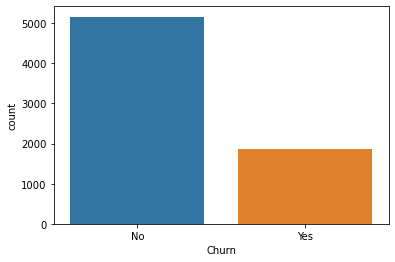

In [8]:
# ploting churn values
sns.countplot(x='Churn',data=df)

In [9]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

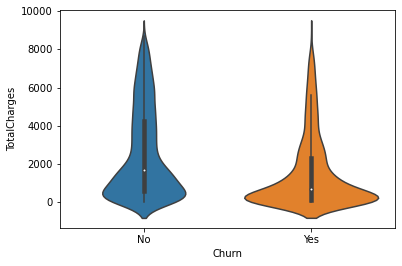

In [10]:
sns.violinplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

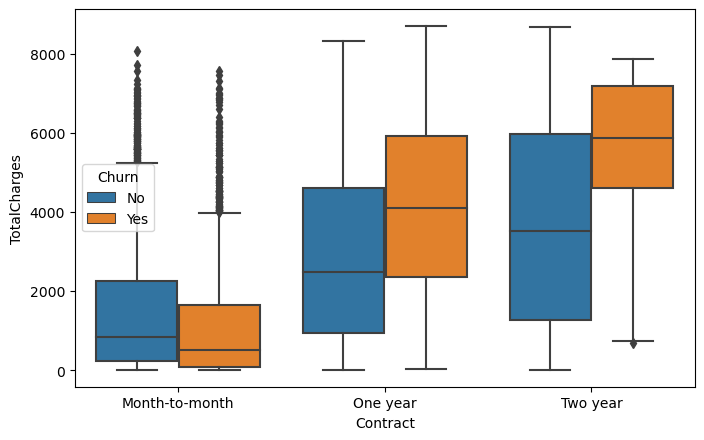

In [11]:
plt.figure(figsize=(8,5),dpi=100)
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn')

In [12]:
#converting imp column to dummy to check correlation
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [13]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [14]:
corr_feat=corr_df.corr()['Churn_Yes'].sort_values().iloc[1:-1]

In [15]:
corr_feat

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

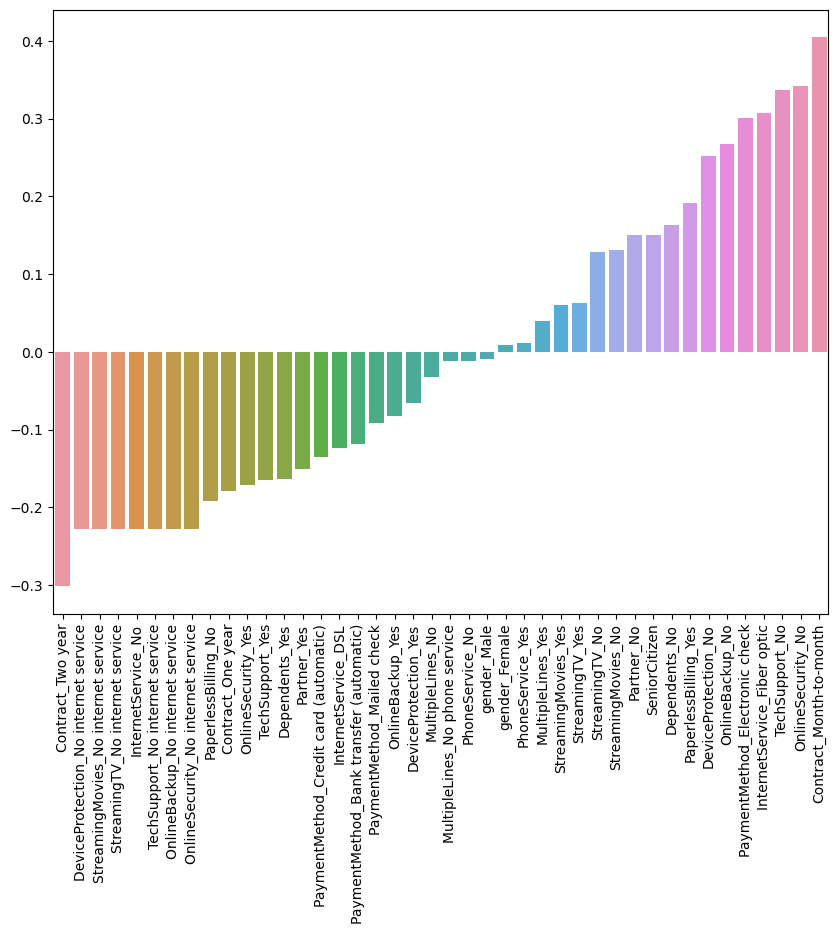

In [16]:
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(x=corr_feat.index,y=corr_feat.values)
plt.xticks(rotation=90);

# Churn Analysis

In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

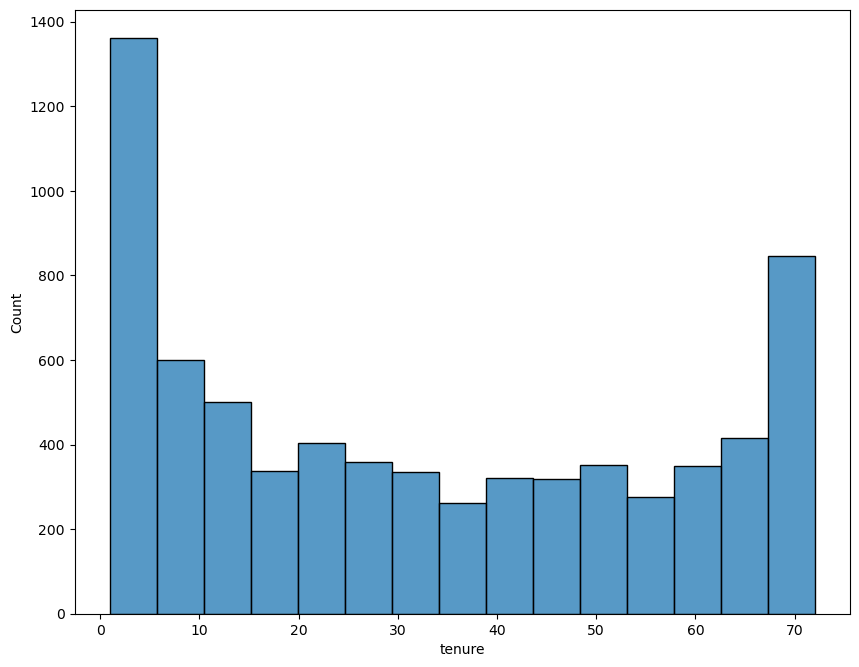

In [18]:
plt.figure(figsize=(10,8),dpi=100)
sns.histplot(x=df['tenure'])

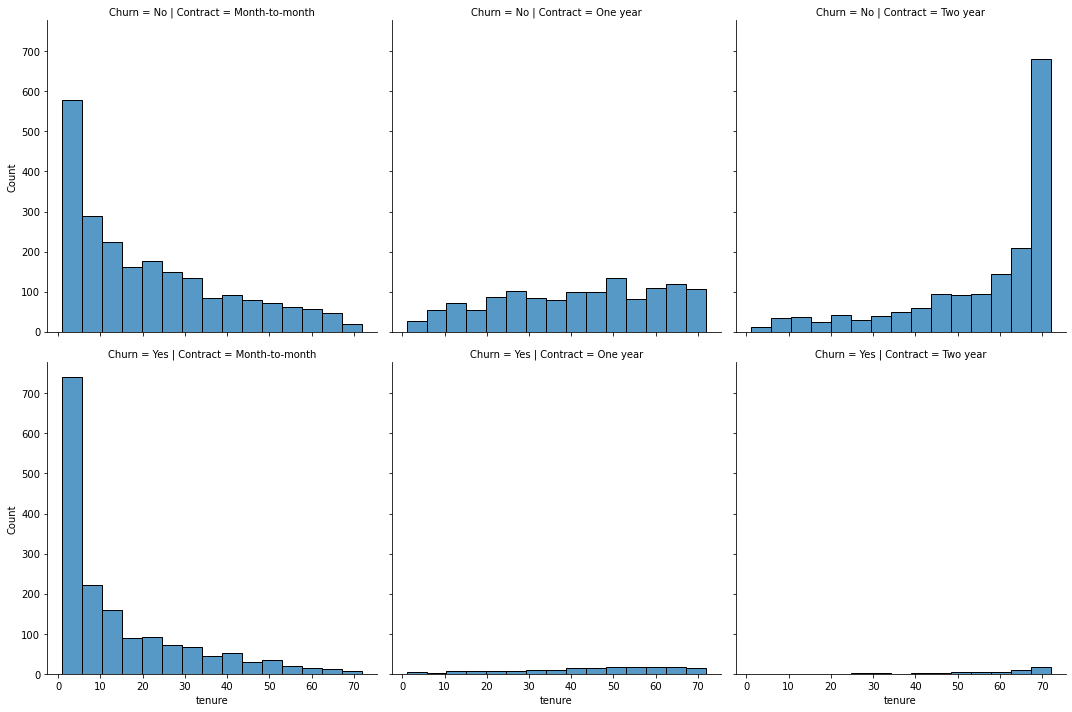

In [19]:

sns.displot(x='tenure',data=df,col='Contract',row='Churn')

# displaying total charges by monthly charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

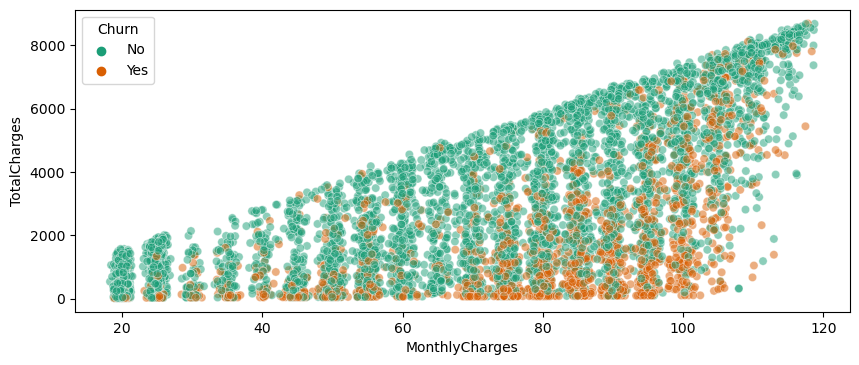

In [20]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',linewidth=0.5,alpha=0.5,palette='Dark2')

In [21]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [22]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [23]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

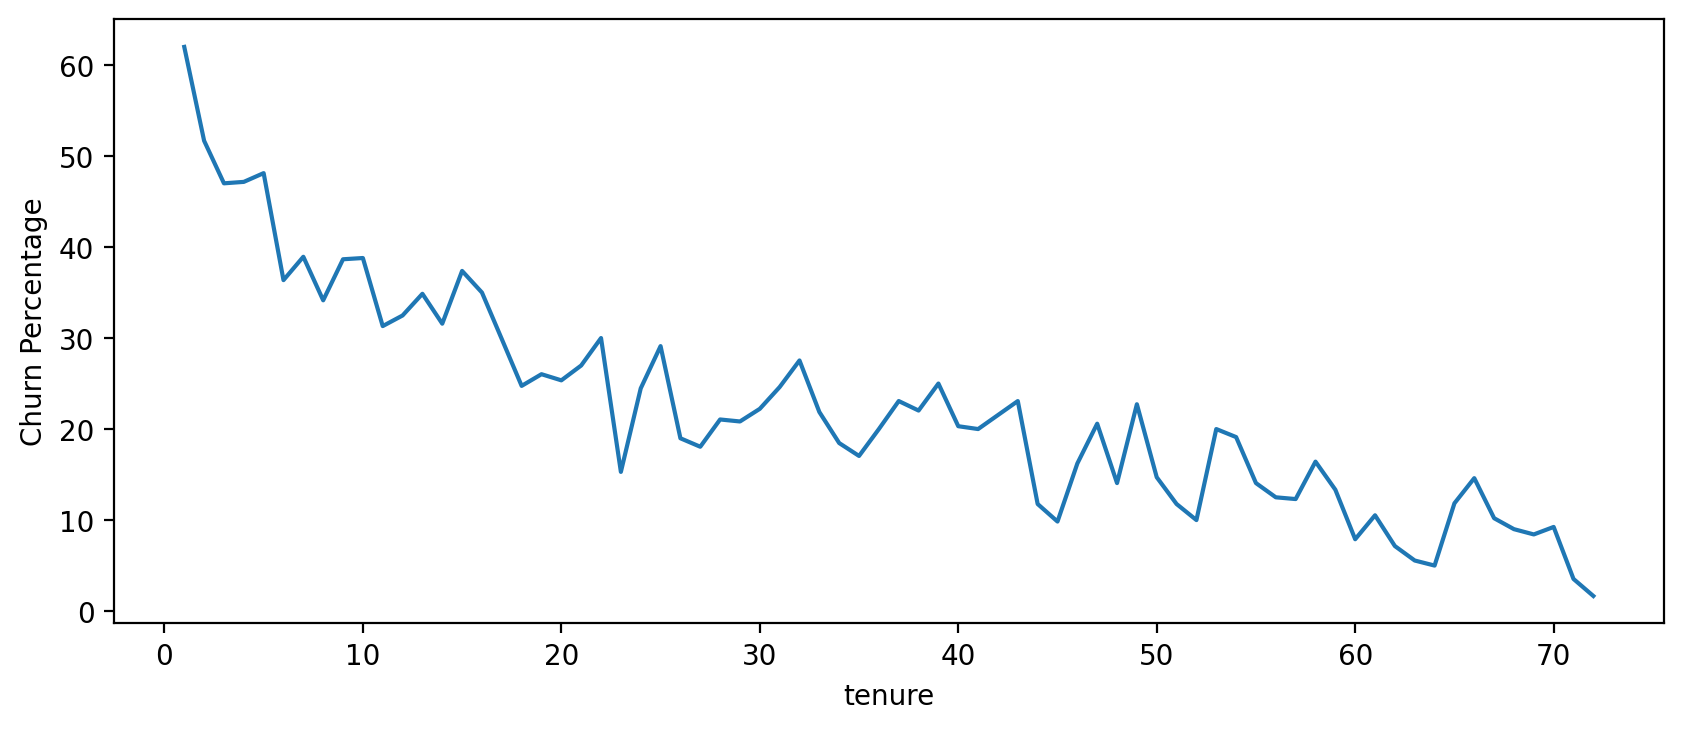

In [24]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [25]:
df['tenure_cohort']=df['tenure'].apply(lambda x: '0-12 Months' if x <= 12 else ('12-24 Months' if x<25 else('24-48 Months' if x<49 else 'Over 48 Months' )))

In [26]:
df[['tenure','tenure_cohort']]

,tenure,tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

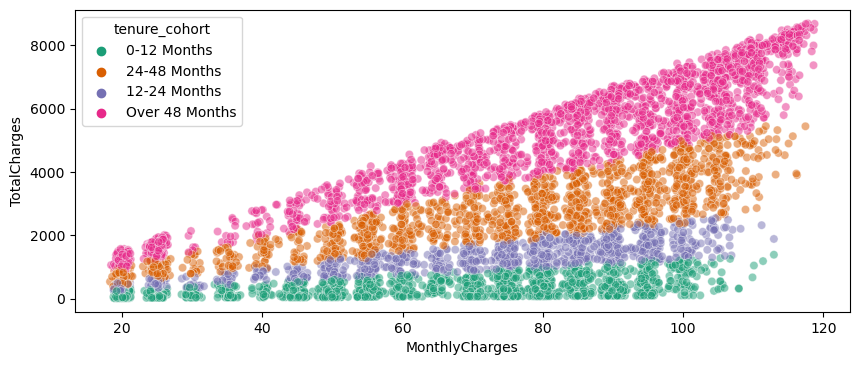

In [27]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='tenure_cohort',linewidth=0.5,alpha=0.5,palette='Dark2')

<AxesSubplot:xlabel='tenure_cohort', ylabel='count'>

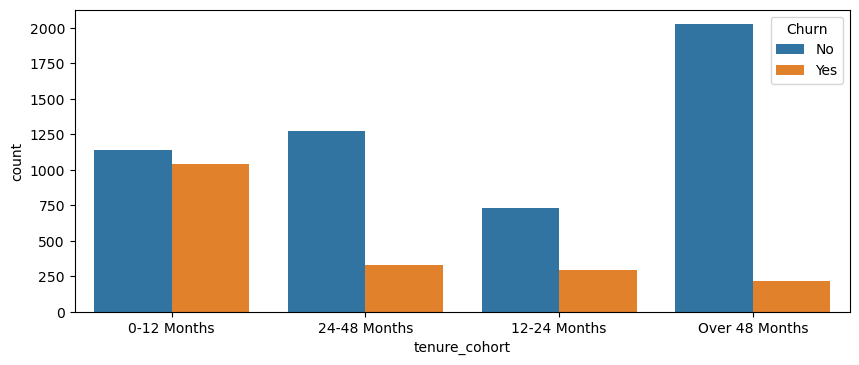

In [28]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='tenure_cohort',hue='Churn',data=df)

<Figure size 1000x400 with 0 Axes>

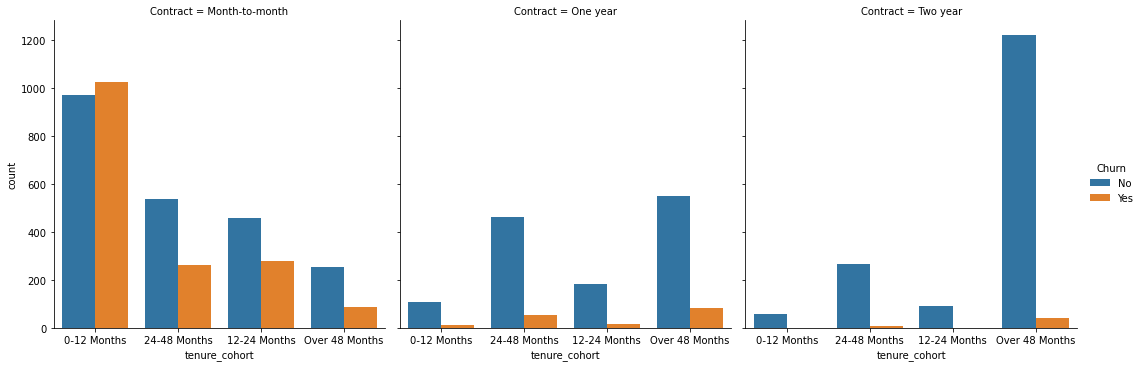

In [29]:
plt.figure(figsize=(10,4),dpi=100)
sns.catplot(x='tenure_cohort',hue='Churn',data=df,kind='count',col='Contract');

# Train |Test split

In [30]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [31]:
y=df.Churn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Prediction

In [34]:
#tree based model
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
# creating funtion to run diffrent model
def run_model(model,X_train,y_train,X_test,y_test):
    #fitting model
    model.fit(X_train,y_train)
    
    #predicting
    y_preds= model.predict(X_test)
    
    #evalution
    print(classification_report(y_test,y_preds))
    print(plot_confusion_matrix(model,X_test,y_test))
    
    imp_feats = pd.DataFrame(data=model.best_estimator_.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
    plt.figure(figsize=(14,6),dpi=200)
    sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
    plt.xticks(rotation=90)
    plt.title("Feature Importance for Decision Tree");

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_model = DecisionTreeClassifier()

In [37]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [38]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(dt_model,param_grid={'max_depth':[6,8,10]})


In [40]:
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10]})

In [41]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [42]:
y_preds= dt_grid.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



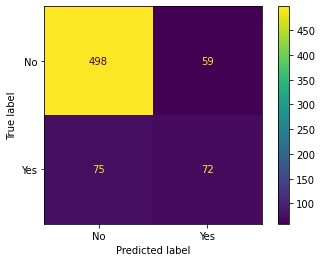

In [45]:
print(plot_confusion_matrix(dt_grid,X_test,y_test))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



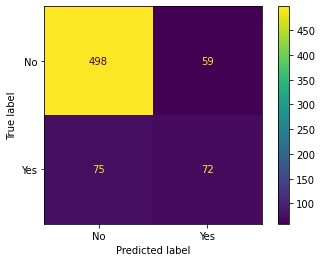

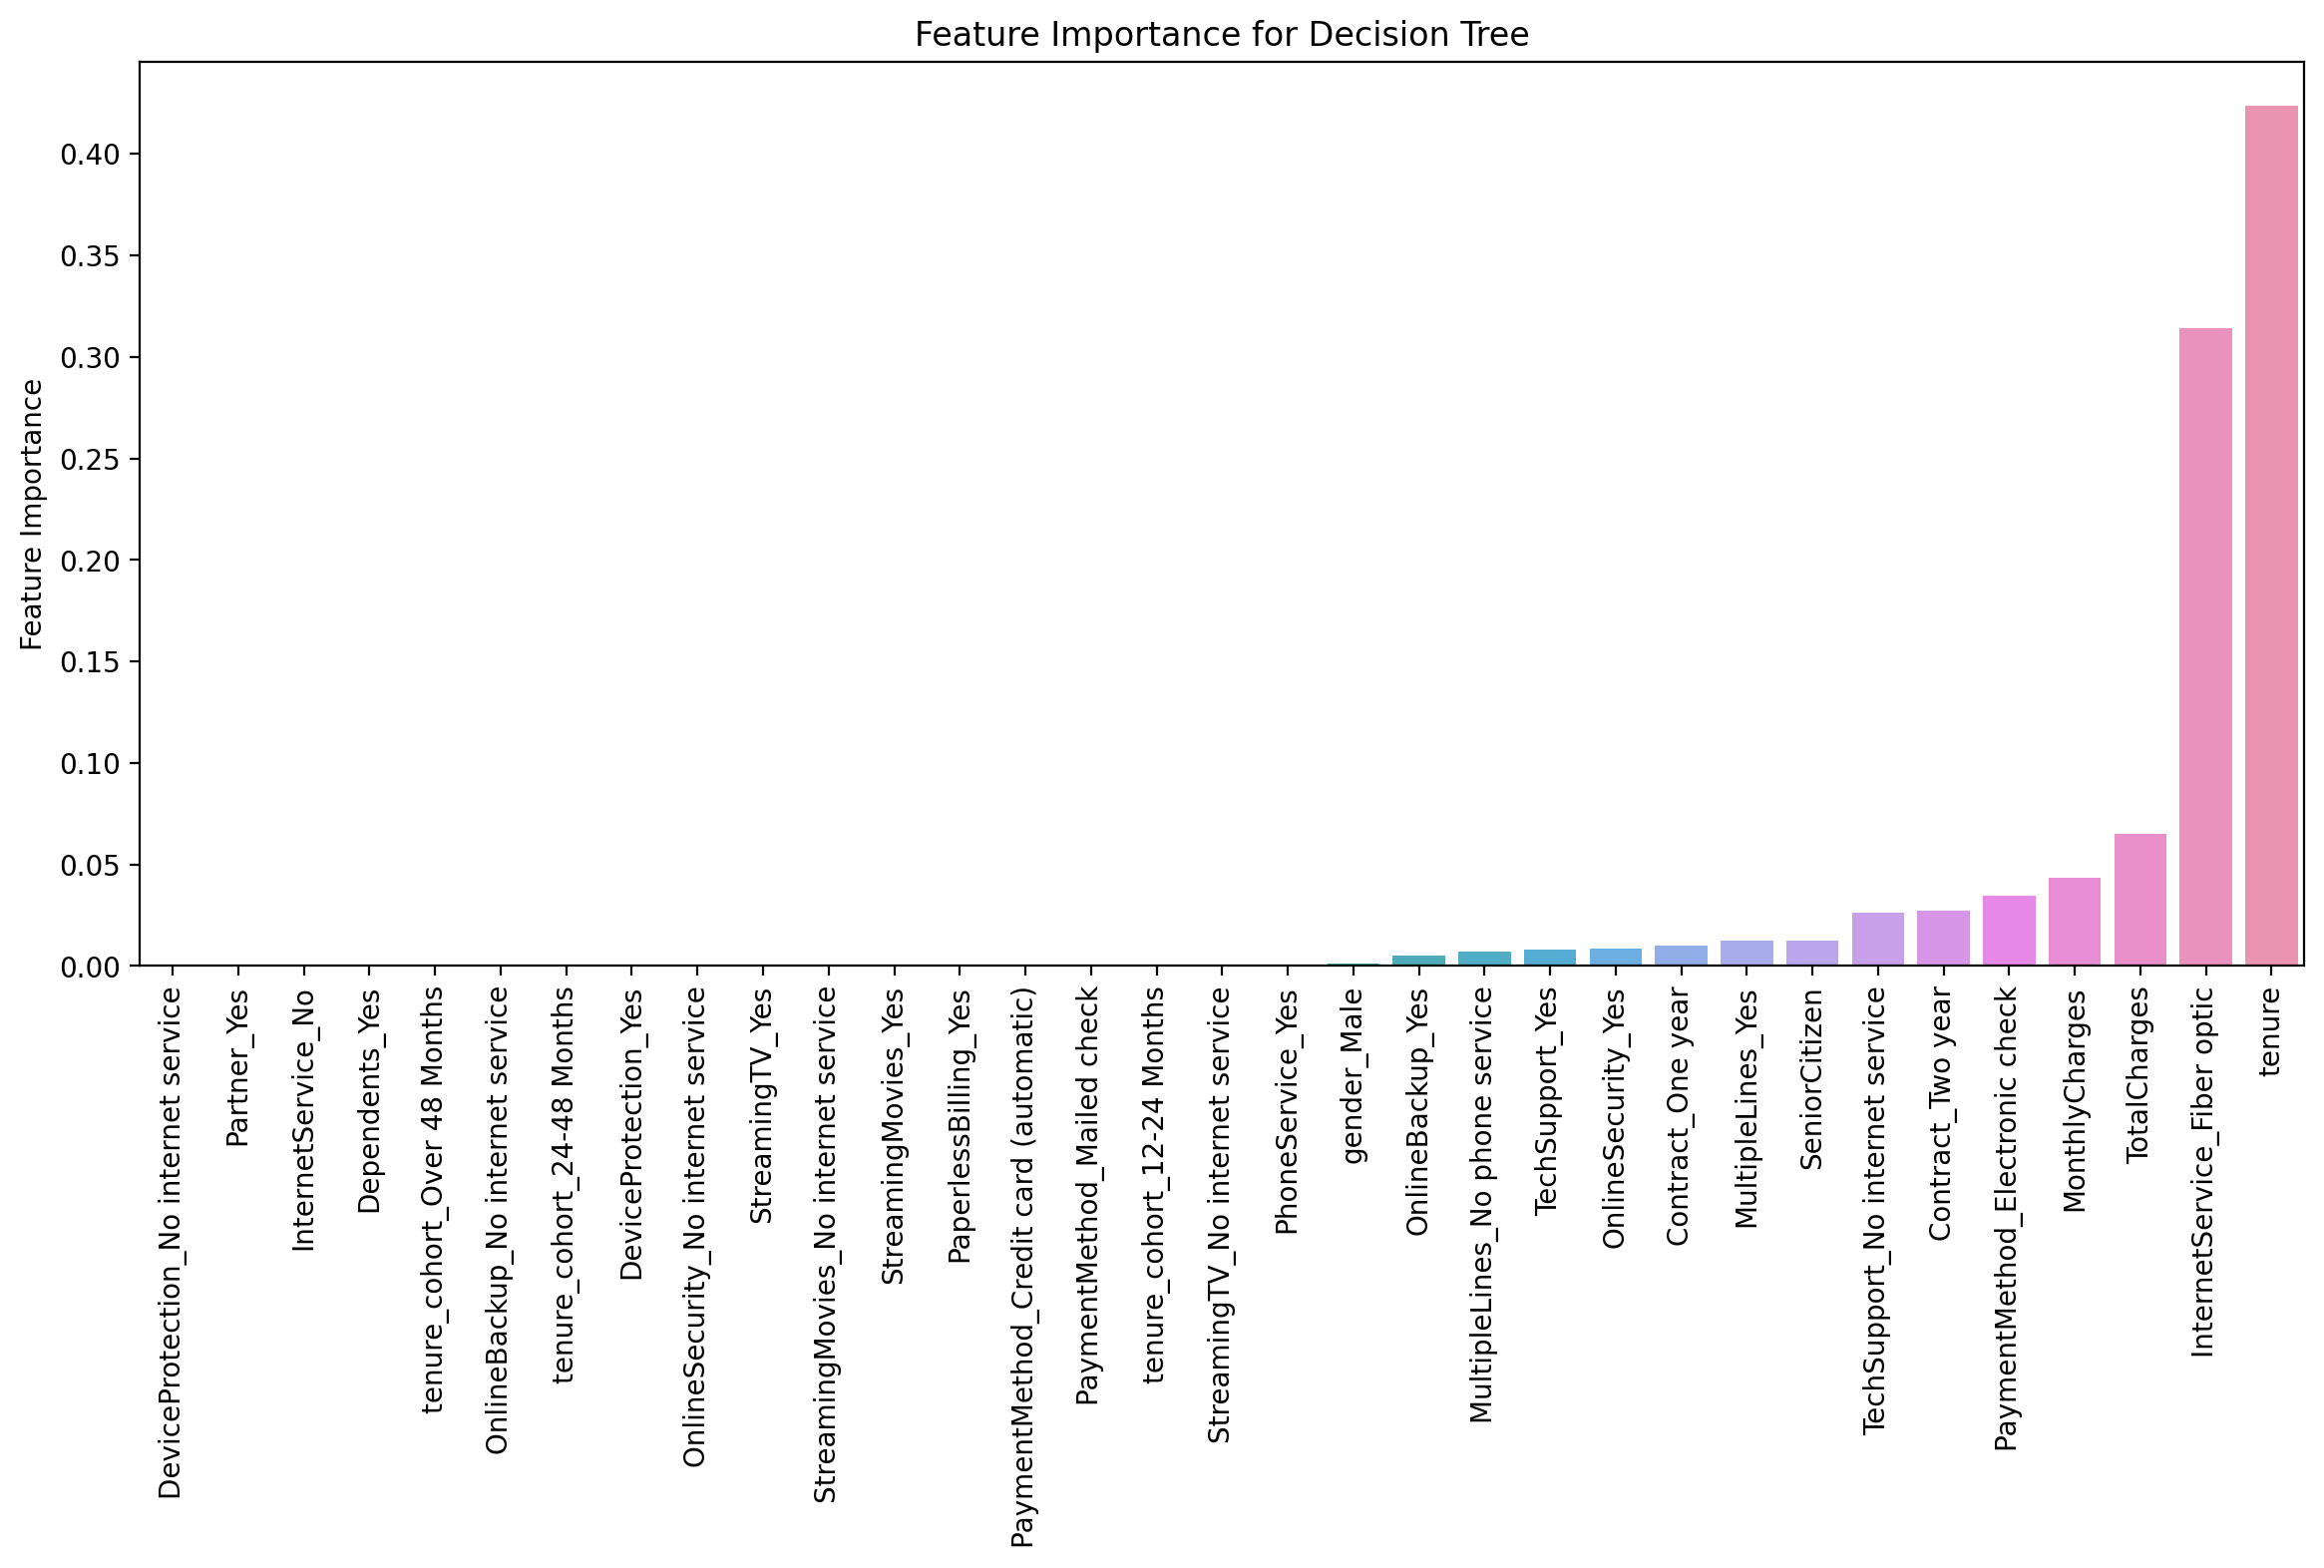

In [46]:
run_model(dt_grid, X_train, y_train, X_test, y_test)

# Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_model=RandomForestClassifier()
rf_grid=GridSearchCV(rf_model,param_grid={'n_estimators':[100],'min_samples_leaf':[10,20,30]})

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.63      0.47      0.54       147

    accuracy                           0.83       704
   macro avg       0.75      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



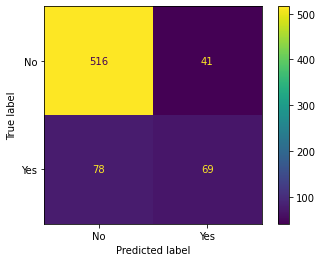

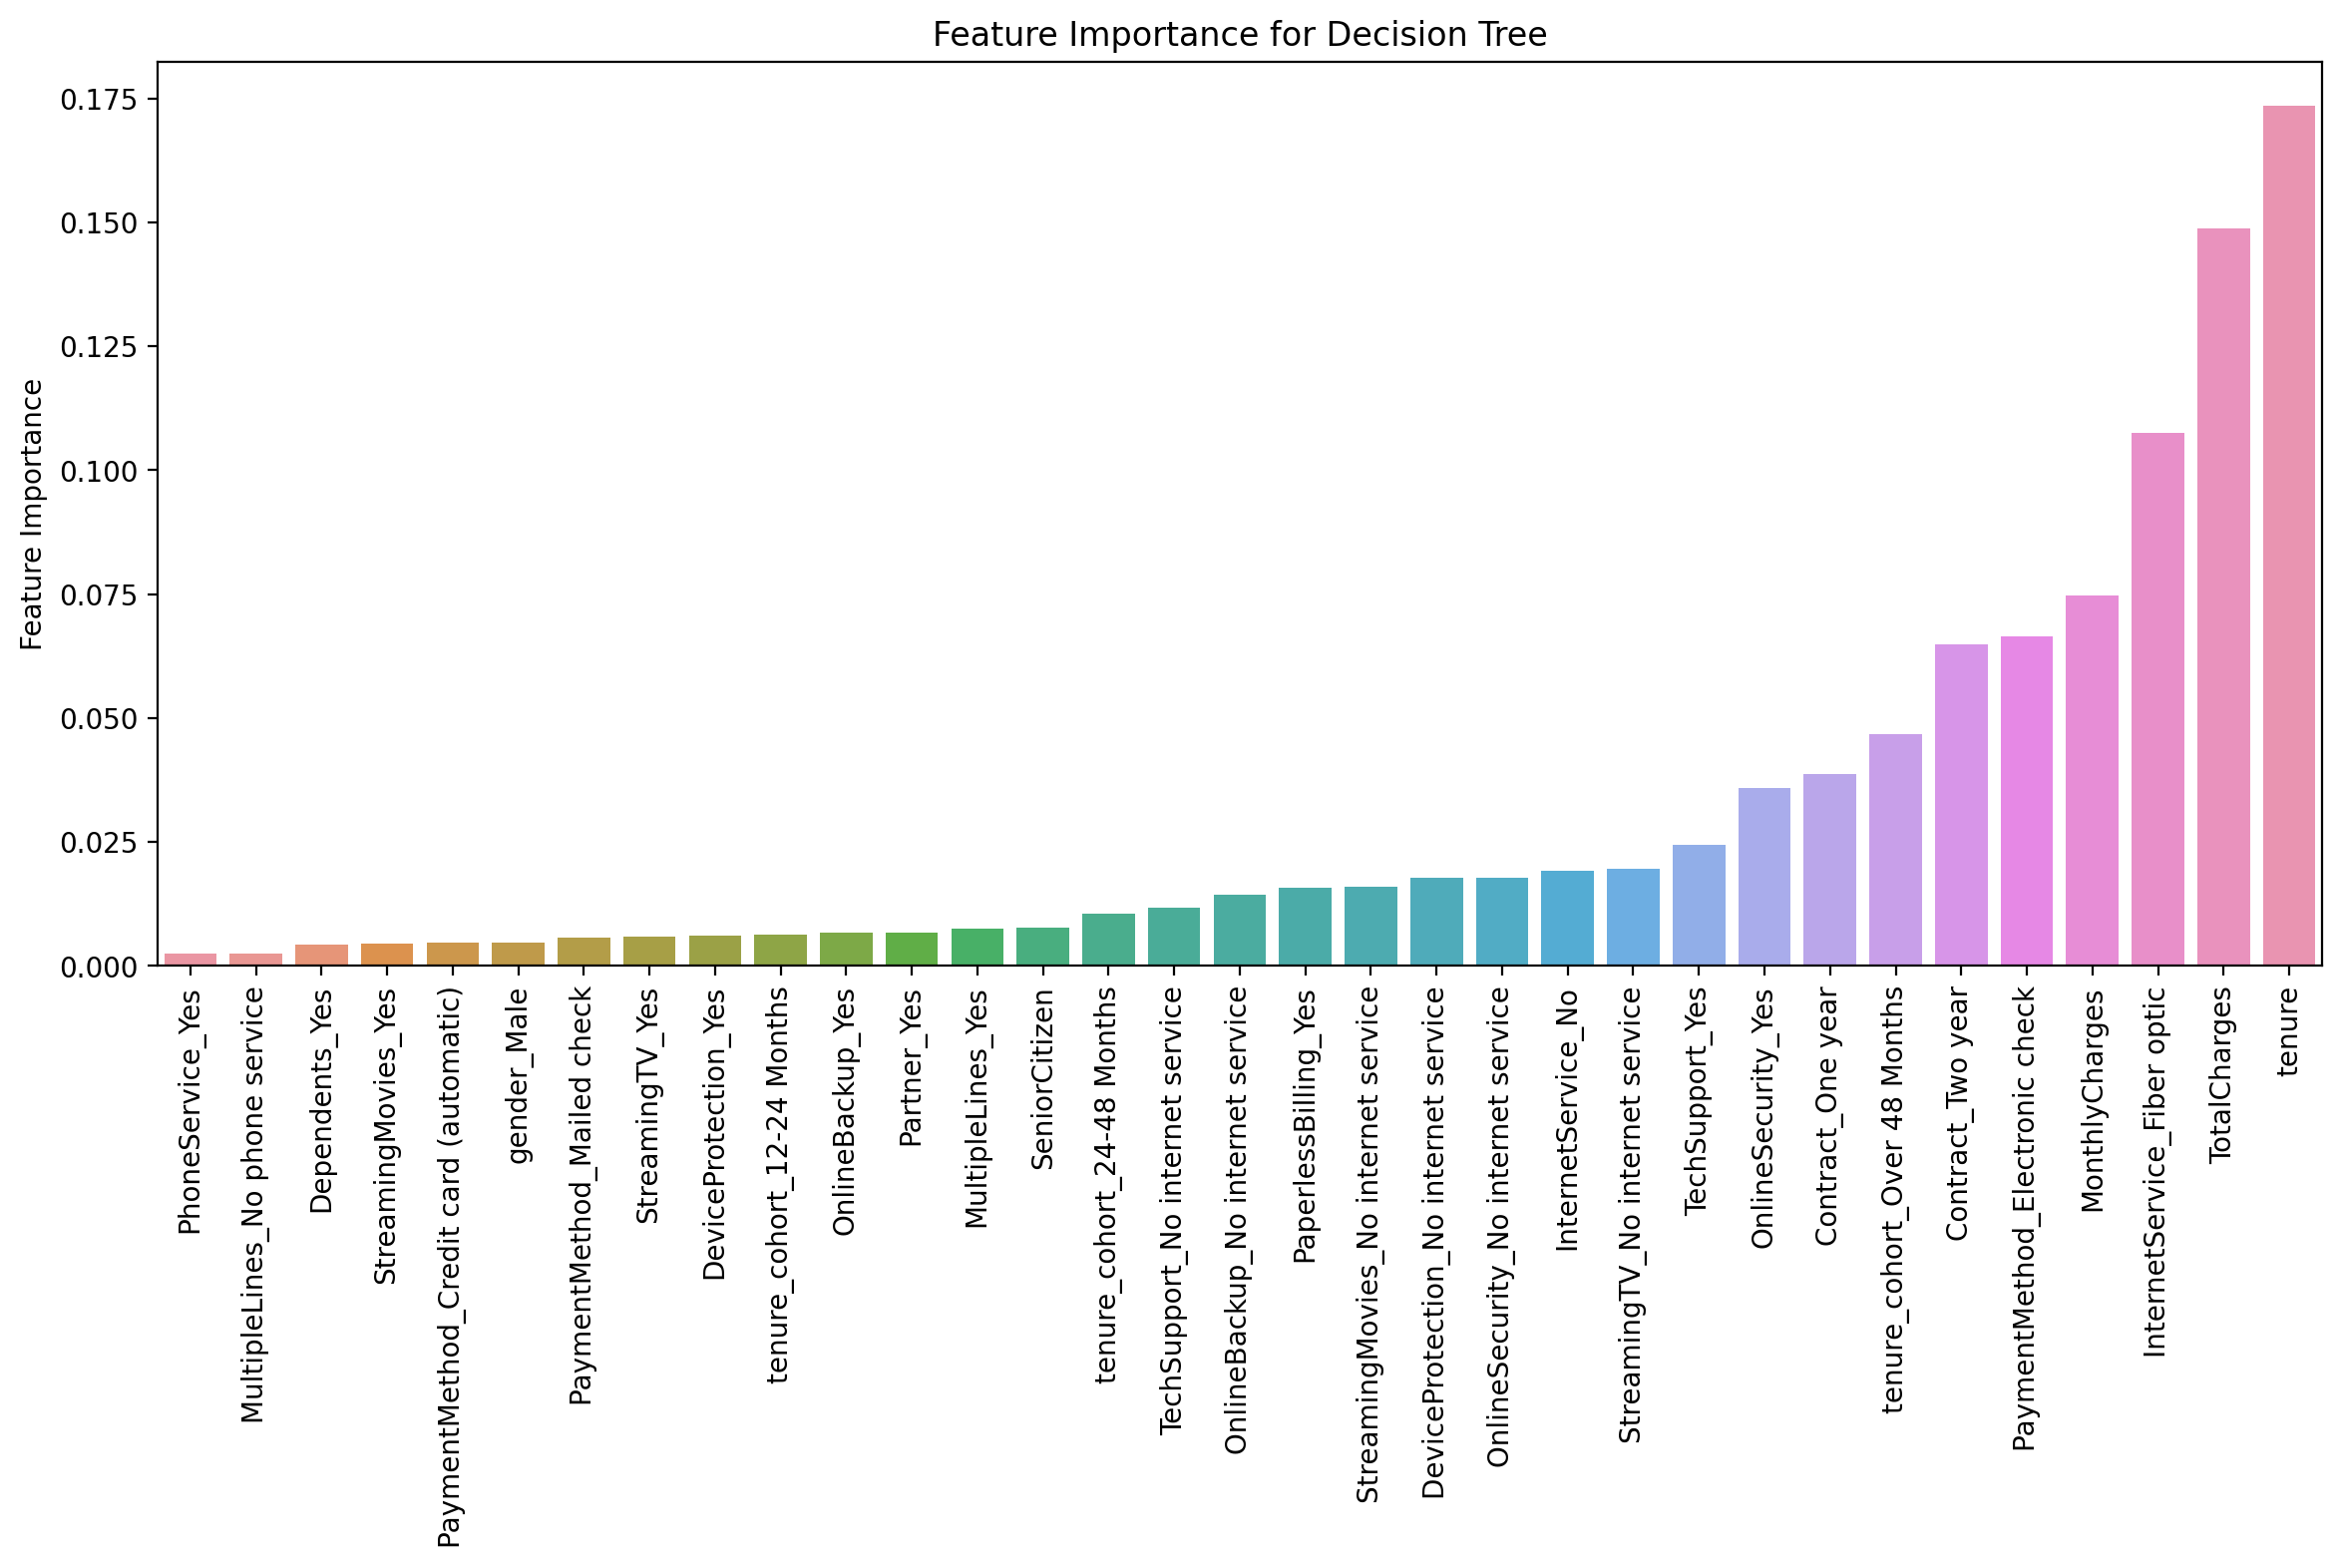

In [49]:
run_model(rf_grid, X_train, y_train, X_test, y_test)